<a href="https://colab.research.google.com/github/Masoud0389/Delay-Attack-Detection/blob/main/Delay_Detection_Deep_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#!pwd

In [9]:
dataset_attacked = pd.read_csv('drive/MyDrive/Datasets/DS_Delay3_attacked.csv')
dataset_normal = pd.read_csv('drive/MyDrive/Datasets/DS_Delay4_normal.csv')
frames = [dataset_attacked, dataset_normal]
dataset = pd.concat(frames)
#print(dataset_attacked)

In [10]:
X = dataset.iloc[:, :]
y = np.arange(0, 3600058)
y = y*0
for i in range(0, 20):
  y[17500+ 60001*i:20000+ 60001*i] = 1
y = pd.DataFrame(y)
#X['l'] = y
#y = dataset.iloc[:, -1]

In [11]:
#print(y[y[0]==1].index.tolist())

# Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [13]:
from sklearn.utils.sparsefuncs import min_max_axis
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
#scaler = RobustScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)
#maxabs_scaler = MaxAbsScaler()
#X_train_scaled = maxabs_scaler.fit_transform(X_train)
#X_test_scaled = maxabs_scaler.fit_transform(X_test)
#min_max_scaler = preprocessing.MinMaxScaler()
#X_train_scaled = min_max_scaler.fit_transform(X_train) 
#X_test_scaled = min_max_scaler.fit_transform(X_test) 
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_train_normalized = normalize(X_train_scaled, norm = 'max')
X_test_normalized = normalize(X_test_scaled, norm = 'max')
# Converting the numpy array into a pandas DataFrame
X_train_normalized = pd.DataFrame(X_train_normalized)
X_test_normalized = pd.DataFrame(X_test_normalized)

# Feature Selection/Reduction

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, whiten= True)
X_train_principal = pca.fit_transform(X_train_normalized)
X_train_principal = pd.DataFrame(X_train_principal)
X_test_principal = pca.fit_transform(X_test_normalized)
X_test_principal = pd.DataFrame(X_test_principal)

# Plot Test

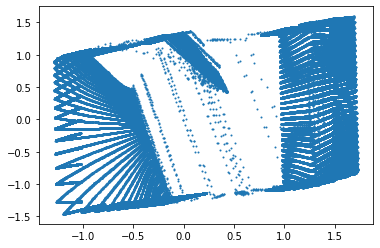

In [15]:
plt.scatter(X_train_principal.iloc[:,0], X_train_principal.iloc[:,1], s = 1 , alpha=1)

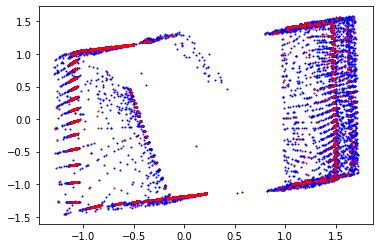

In [16]:
plt.scatter(X_train_principal.iloc[:17500,0], X_train_principal.iloc[:17500,1], c = 'b', s = 1 , alpha=1)
plt.scatter(X_train_principal.iloc[20000:30000,0], X_train_principal.iloc[20000:30000,1],c = 'b', s = 1 , alpha=1)
plt.scatter(X_train_principal.iloc[17500:20000,0], X_train_principal.iloc[17500:20000,1], c = 'r', s = 1 , alpha=1)
plt.show()

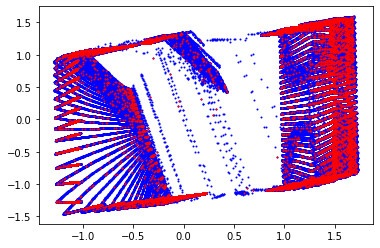

In [19]:

#print(X_principal.iloc[:,0])
plt.scatter(X_train_principal.iloc[:,0], X_train_principal.iloc[:,1],c = 'b', s = 1 , alpha=1)
for i in range(0, 20):
  plt.scatter(X_train_principal.iloc[17500 + 60001*i:20000+ 60001*i,0], X_train_principal.iloc[17500+ 60001*i:20000+ 60001*i,1],c = 'r', s = 1 , alpha=1)
#plt.title('Scatter plot')
#plt.xlabel('x')
#plt.ylabel('y')
#plt.show()

# Anomaly Detection

In [ ]:
#from sklearn.utils import multiclass
#from sklearn.linear_model import LinearRegression
#reg = LinearRegression().fit(X_train_principal, y_train)


In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
#classifier.fit(X_train_principal, y_train)

In [ ]:
#from sklearn.naive_bayes import GaussianNB
#classifier = GaussianNB()
#classifier.fit(X_train_principal, y_train)

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#classifier.fit(X_train_principal, y_train)

In [ ]:
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train_principal, y_train)

In [ ]:
#from sklearn.svm import SVC
#classifier = SVC(kernel = 'linear', random_state = 0)
#classifier.fit(X_train_principal, y_train)

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
#classifier = DecisionTreeClassifier(criterion = 'entropy')
#classifier.fit(X_train_principal, y_train)

In [29]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train_principal, y_train, batch_size = 100, epochs = 1)

28801/28801 [==============================] - 71s 2ms/step - loss: 0.2143 - accuracy: 0.9861 - f1_metric: 0.0000e+00


In [ ]:
#from sklearn.svm import SVC
#classifier = SVC(kernel = 'rbf', random_state = 0)
#classifier.fit(X_train_principal, y_train)

# Results

In [33]:

y_pred = ann.predict(X_test_principal)
#test_loss, test_acc = ann.evaluate(X_test_principal, y_test)
#print('Test accuracy:', test_acc)
#print(f1_metric(y_test, y_pred))
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
#ann.score(X_test_principal, y_pred)
#cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
#TN = cm[0][0]
#FN = cm[1][0]
#TP = cm[1][1]
#FP = cm[0][1]
[prec, rec, f1, n] = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision is: ', prec)
print('Accuracy is: ', acc)
print('Recall is: ', rec)
print('F1_Score is: ', f1)
#print('True Negative is: ', TN, "\nFalse Negative is: ", FN, '\nTrue Positive is: ', TP, '\nFalse Positive is: ', FP)
#test_loss, test_acc = ann.evaluate(X_test_principal,  y_pred, verbose=2)
#print('\nTest accuracy:', test_acc)


ValueError: ignored

In [ ]:
#!pip install tensorflow-addons
import tensorflow_addons as tfa
metric = tfa.metrics.F1Score(num_classes=2, threshold=0.5)
#print(type(y_test))
#y_true = y_test.to_numpy()
#y_pred = np.array(y_pred)

metric.update_state(y_test, y_pred)
result = metric.result()
result.numpy()


InvalidArgumentError: ignored

# Visualization

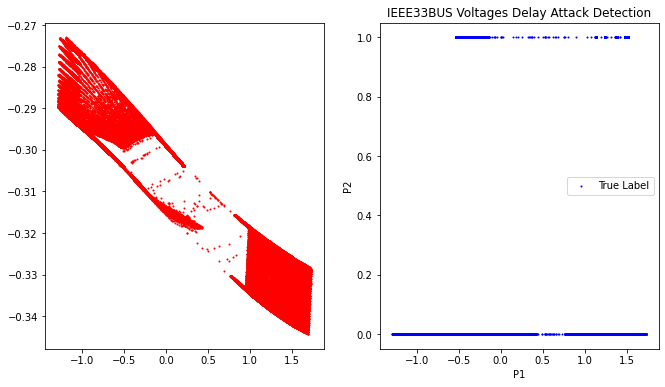

In [24]:
fig, ax = plt.subplots(ncols = 2) 
fig.set_figheight(6)
fig.set_figwidth(11)
ax[0].scatter(X_test_principal.iloc[:, 0], y_pred[:], s = 1, c = 'red', label = 'Predicted Label', alpha= 1)
ax[1].scatter(X_test_principal.iloc[:, 0], y_test.iloc[:, 0], s = 1, c = 'blue', label = 'True Label', alpha = 1)
#plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], c = 'b', s = 1 , alpha=1)
#plt.scatter(values.iloc[:, 0], values.iloc[:, 1], c = 'r', s = 1 , alpha=1)
plt.title('IEEE33BUS Voltages Delay Attack Detection')
plt.xlabel('P1')
plt.ylabel('P2')
plt.legend()
plt.show() 

In [ ]:
#index = np.where(label == -1)
#index1 = np.where(label==1)
#index = tuple((i+100000)/20000 for i in index)
#index1 = tuple((i+100000)/20000 for i in index1)

In [ ]:
#plt.scatter(index, X_principal.loc[label == -1, 1], s = 1, c = 'red', label = 'Outliers Data')
#plt.scatter(index1, X_principal.loc[label == 1, 1], s = 1, c = 'blue', label = 'Normal Data')
#plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], c = 'b', s = 1 , alpha=1)
#plt.scatter(values.iloc[:, 0], values.iloc[:, 1], c = 'r', s = 1 , alpha=1)
#plt.title('IEEE33BUS Voltages Delay Attack Detection')
#plt.xlabel('Time')
#plt.ylabel('V')
#plt.legend()
#plt.show() 

In [ ]:
#ind = pd.Series(range(1,500001))
#ind = (ind/20000)+5
#plt.scatter(index, X_principal.loc[label == -1, 1], s = 1, c = 'red', label = 'Outliers Data')

In [ ]:
#plt.scatter(ind[200000:260001], X_principal.loc[200000:260000,1], s = 1 )